### Customer Segmentation

- Use a customer dataset to group customers into different segments based on their
 purchasing behavior. Apply clustering techniques like KMeans to identify patterns
 and describe the characteristics of each segment. Preprocess the data, perform
 clustering, and visualize the results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


- Data Loading & Inspection
Loaded customer shopping data from CSV.
Displayed the first few rows and checked for missing values, duplicates, and data types.

In [2]:
df = pd.read_csv("shopping_trends.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


#### Data Preprocessing

In [4]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(3900, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features


['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

#### Univariate Analysis

- Visualized distributions of categorical features using countplots.
- Plotted histograms for numerical features.

##### Categorical Variables

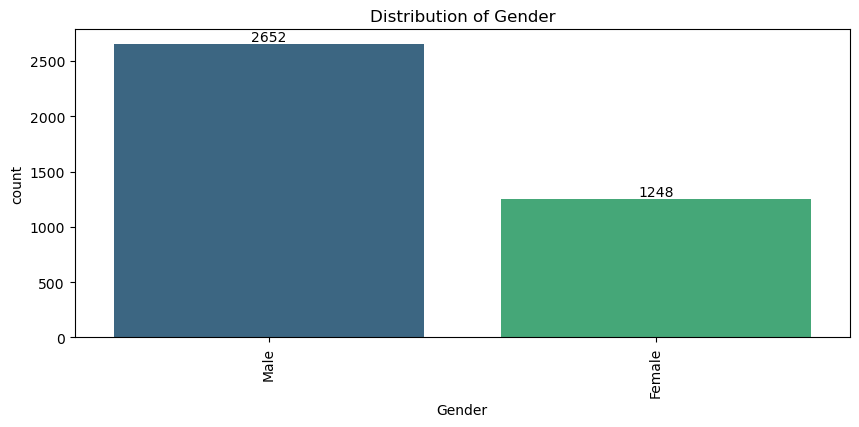

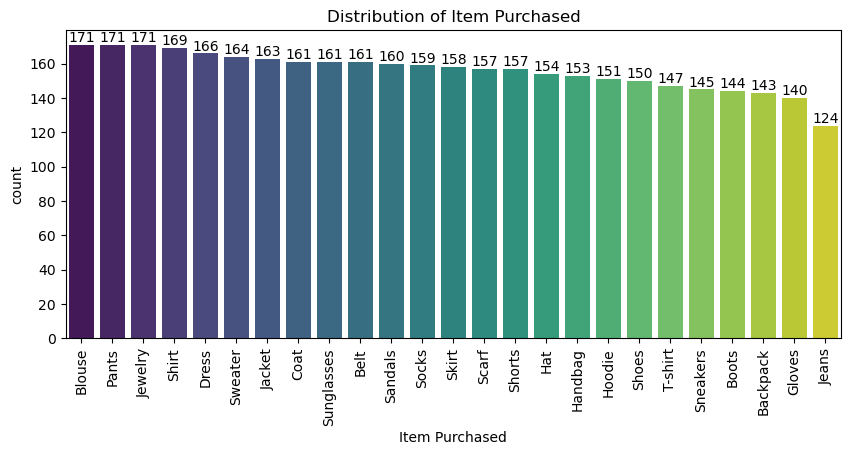

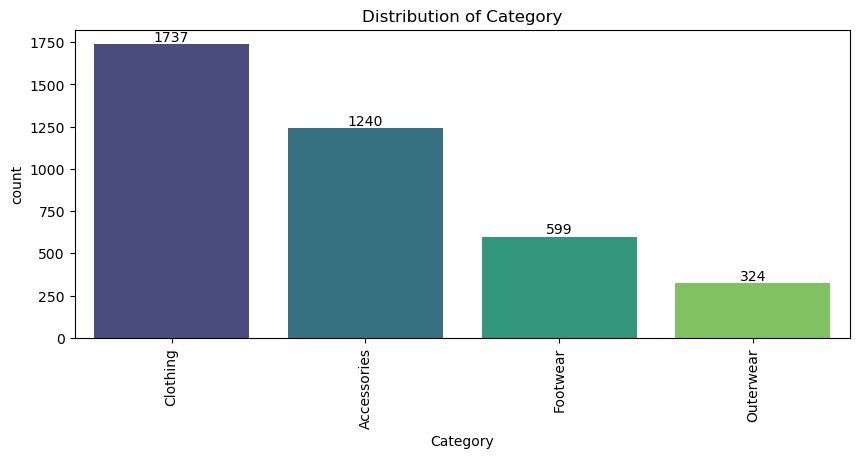

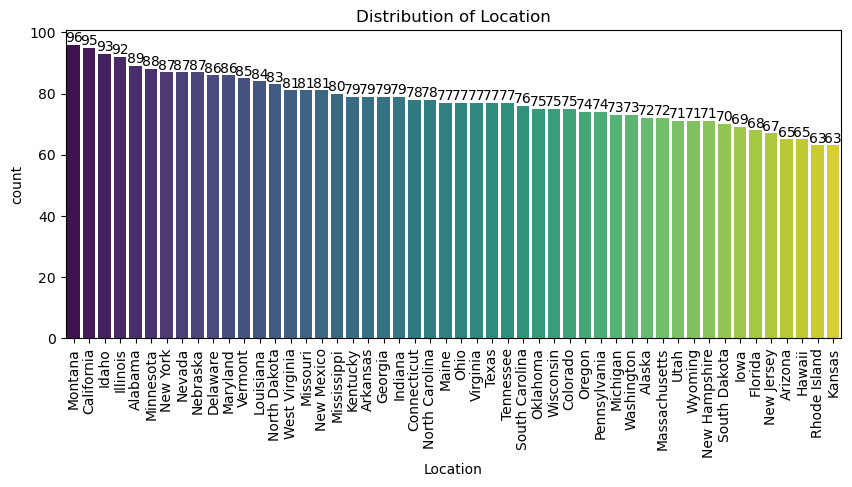

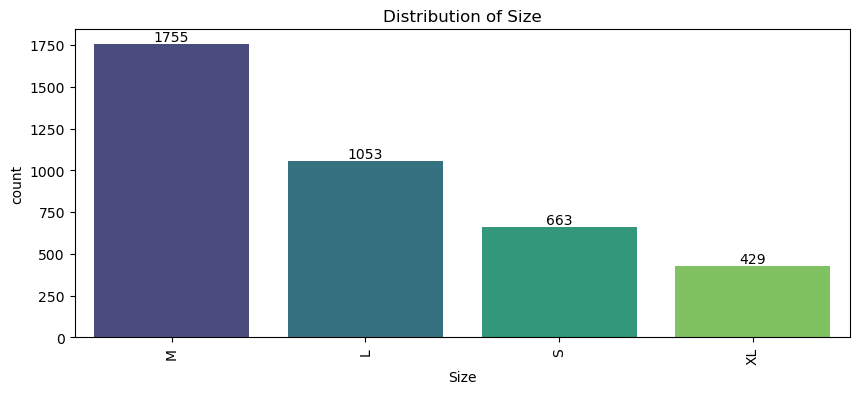

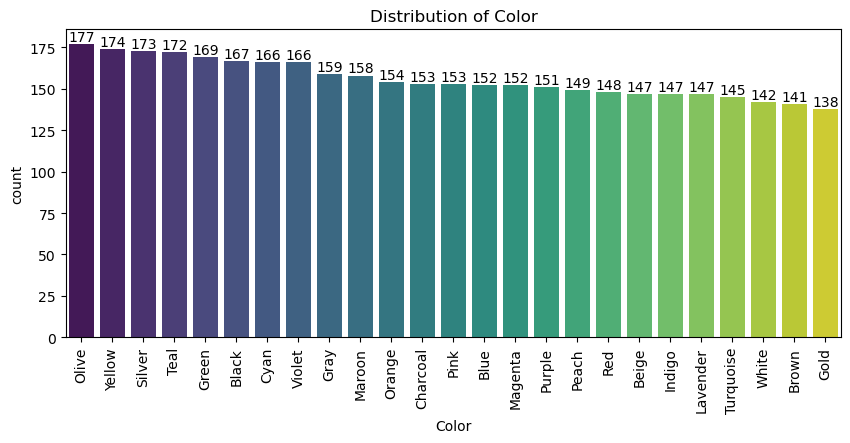

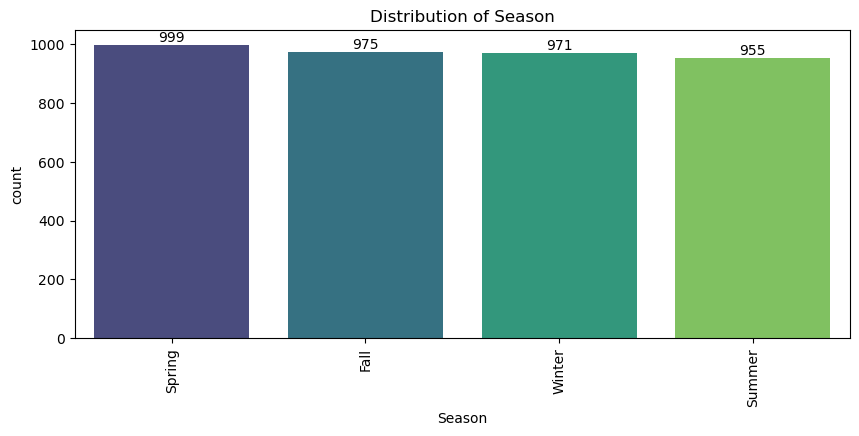

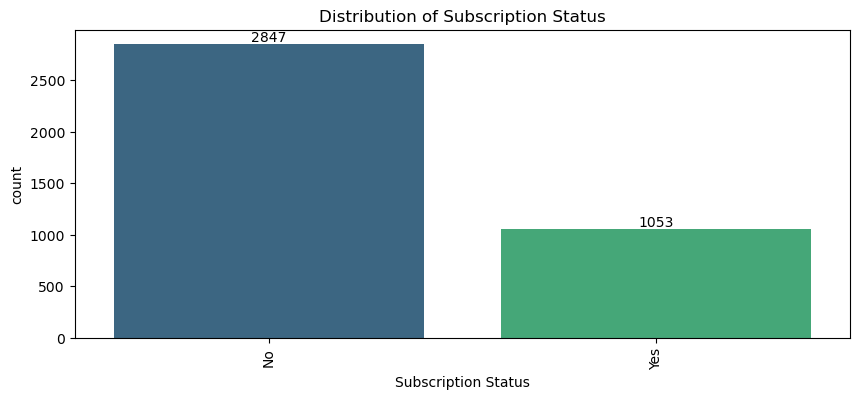

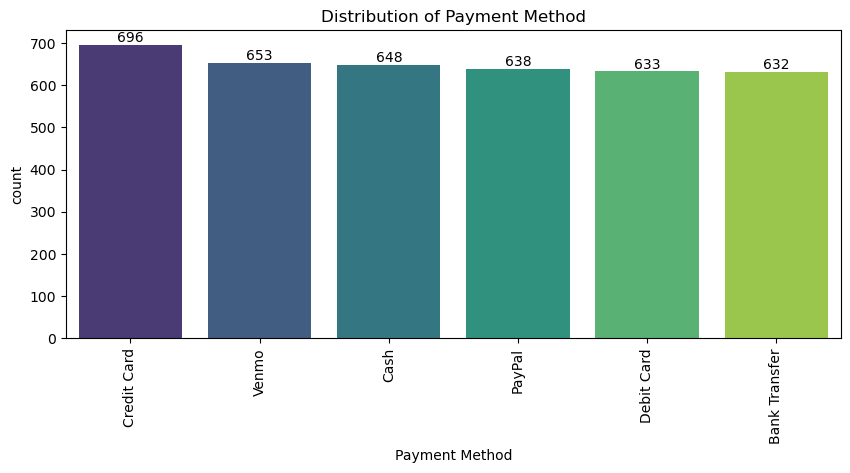

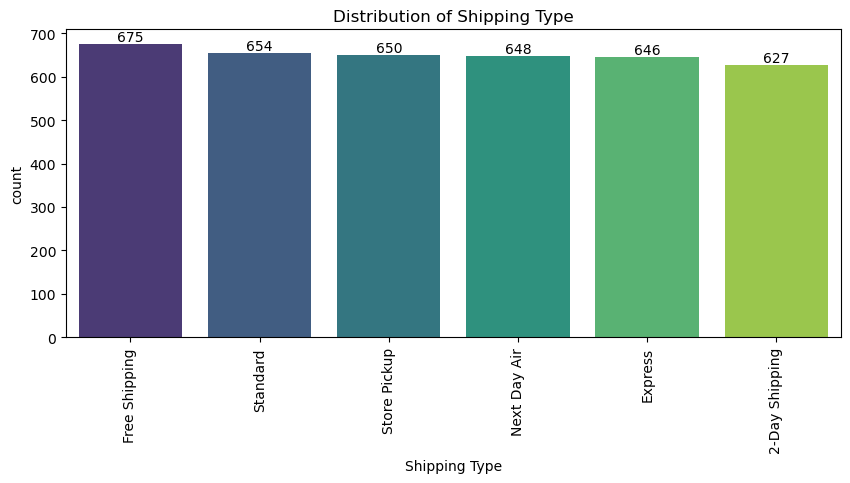

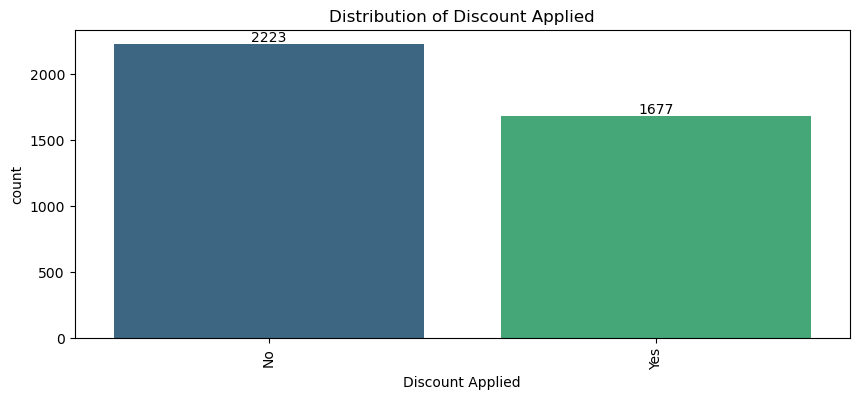

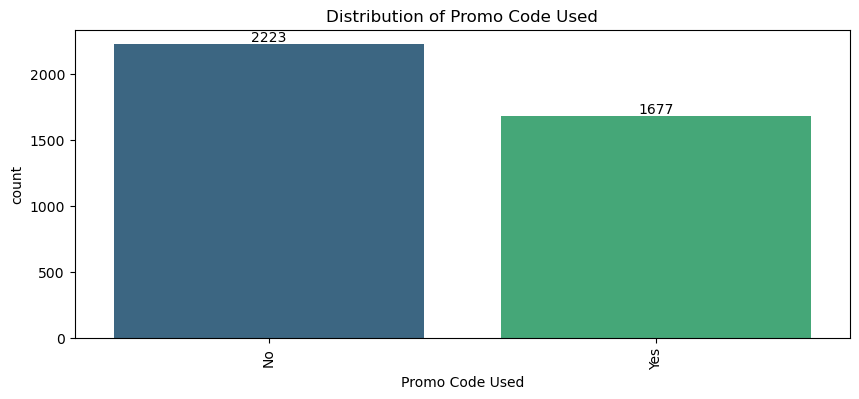

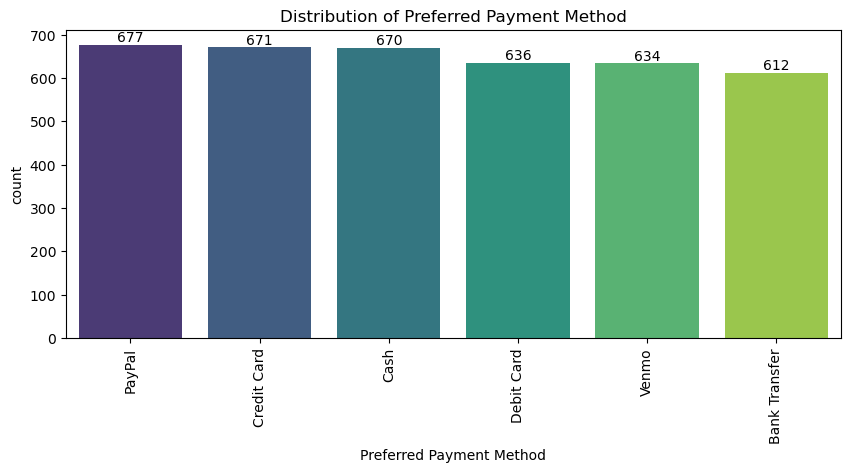

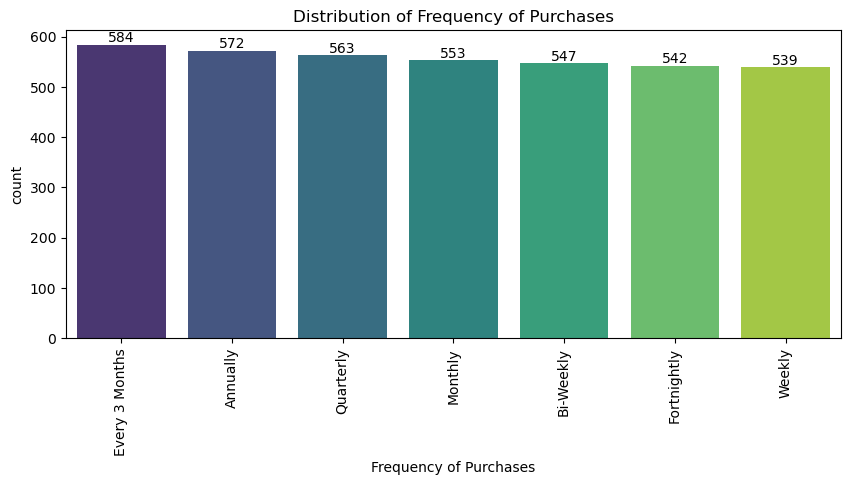

In [10]:
for col in categorical_features:
    plt.figure(figsize=(10,4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    for bar in ax.containers:
        ax.bar_label(bar)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col}")
    plt.show()


##### Numerical Variables

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

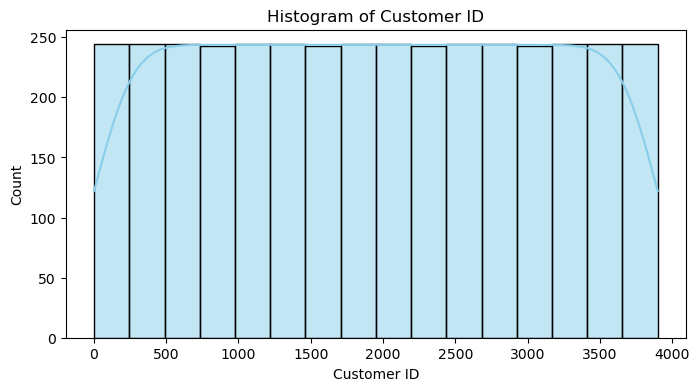

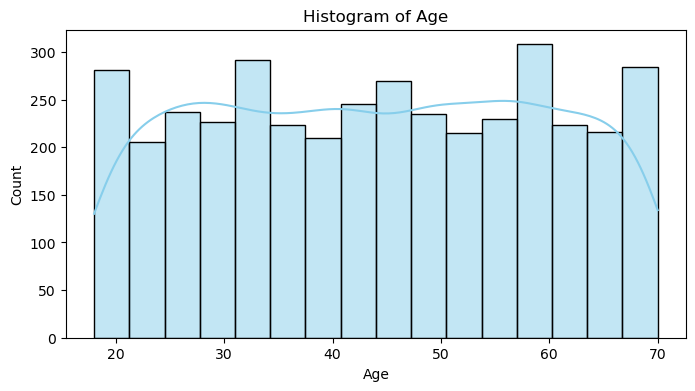

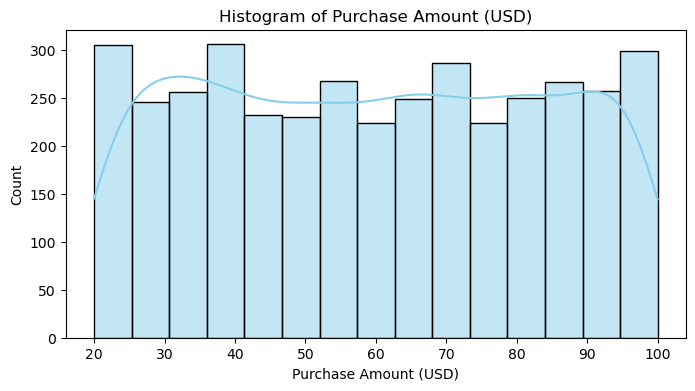

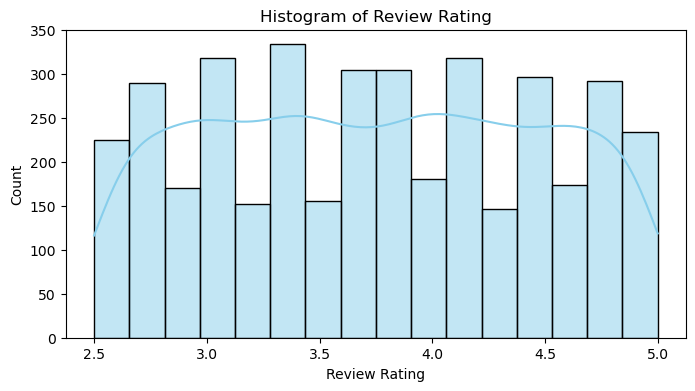

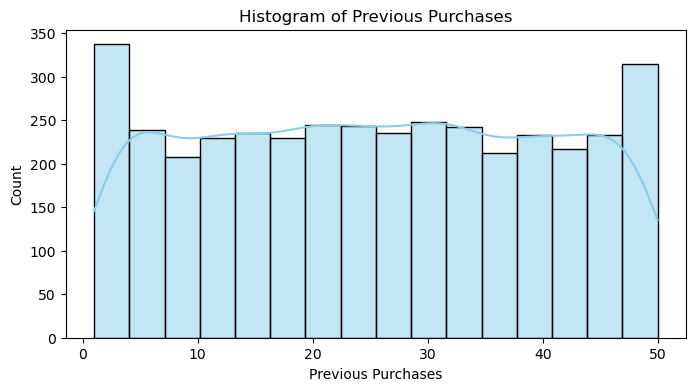

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

#### Bivariate Analysis

- Compared purchase amounts and item counts across categories like Gender, Payment Method, Season, Frequency, etc.
- Explored relationships between Loyalty Groups and spending, review ratings, and discount usage.

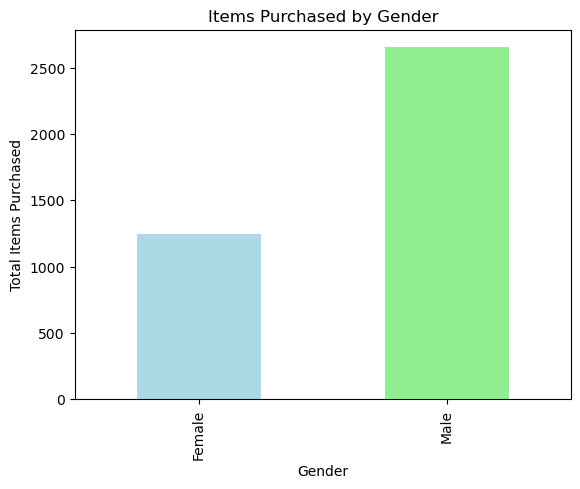

In [13]:
df.groupby('Gender')['Item Purchased'].count().plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title("Items Purchased by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Items Purchased")
plt.show()

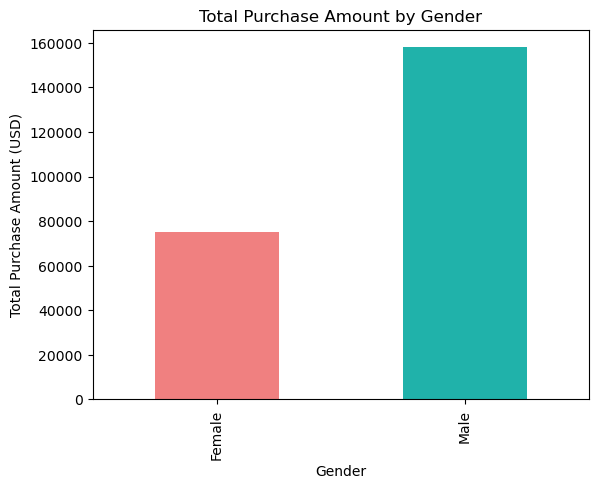

In [14]:
df.groupby('Gender')['Purchase Amount (USD)'].sum().plot(kind='bar', color=['lightcoral', 'lightseagreen'])
plt.title("Total Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

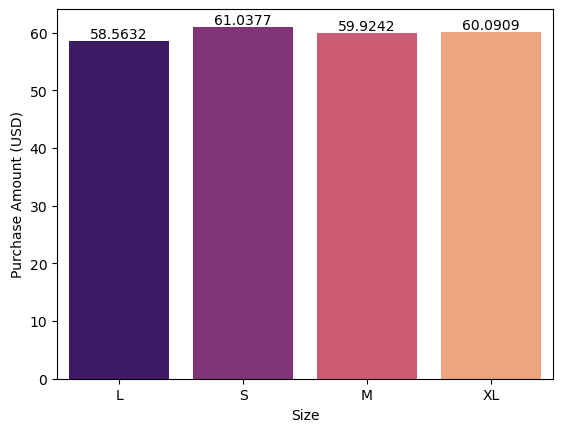

In [15]:
ax = sns.barplot(data=df, x='Size', y='Purchase Amount (USD)', ci=None, palette="magma")
for a in ax.containers:
    ax.bar_label(a)

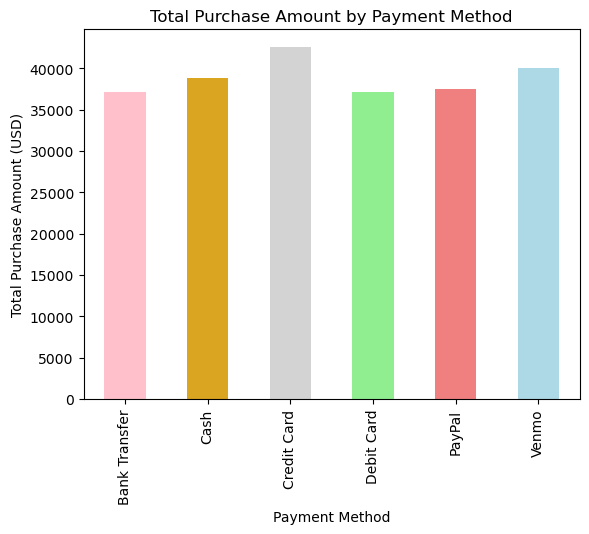

In [16]:
df.groupby('Payment Method')['Purchase Amount (USD)'].sum().plot(kind='bar', color=['pink', 'goldenrod', 'lightgrey', 'lightgreen', 'lightcoral', 'lightblue'])
plt.title("Total Purchase Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

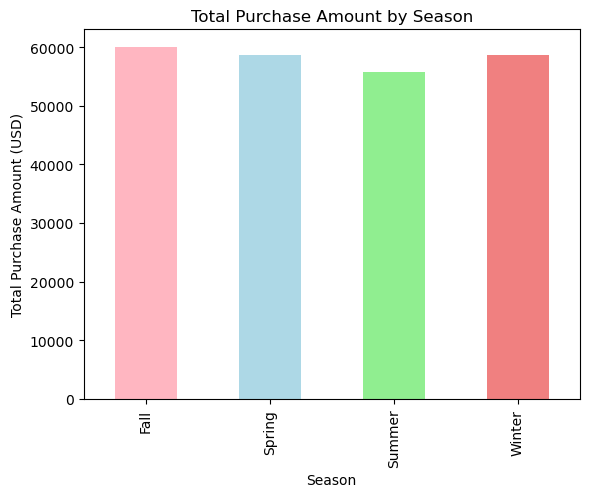

In [17]:
df.groupby('Season')['Purchase Amount (USD)'].sum().plot(kind='bar', color=['lightpink', 'lightblue', 'lightgreen', 'lightcoral'])
plt.title("Total Purchase Amount by Season")
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

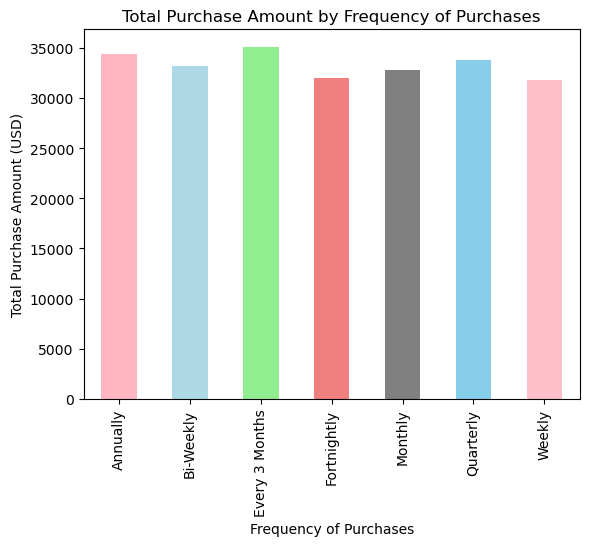

In [18]:
df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum().plot(kind='bar', color=['lightpink', 'lightblue', 'lightgreen', 'lightcoral', 'grey', 'skyblue', 'pink'])
plt.title("Total Purchase Amount by Frequency of Purchases")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

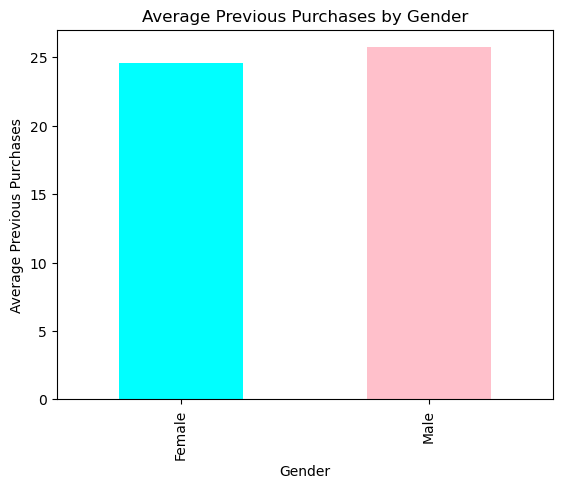

In [19]:
df.groupby('Gender')['Previous Purchases'].mean().plot(kind='bar', color=['cyan', 'pink'])
plt.title("Average Previous Purchases by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Previous Purchases")
plt.show()

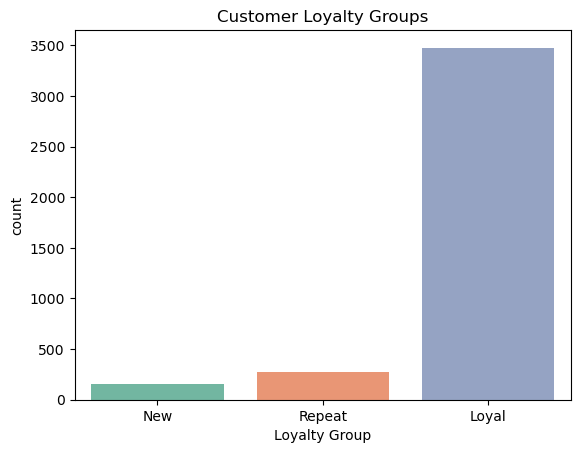

In [20]:
df['Loyalty Group'] = pd.cut(df['Previous Purchases'], bins=[-1,2,5,df['Previous Purchases'].max()], labels=['New','Repeat','Loyal'])
sns.countplot(x='Loyalty Group', data=df, palette='Set2')
plt.title("Customer Loyalty Groups")
plt.show()

- Checking If loyal Customers spends more ?

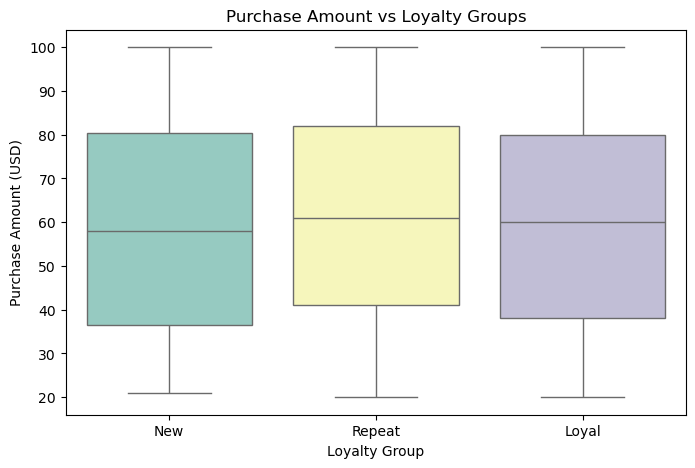

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Loyalty Group', y='Purchase Amount (USD)', data=df, palette="Set3")
plt.title("Purchase Amount vs Loyalty Groups")
plt.show()

- Relationship with Review Rating

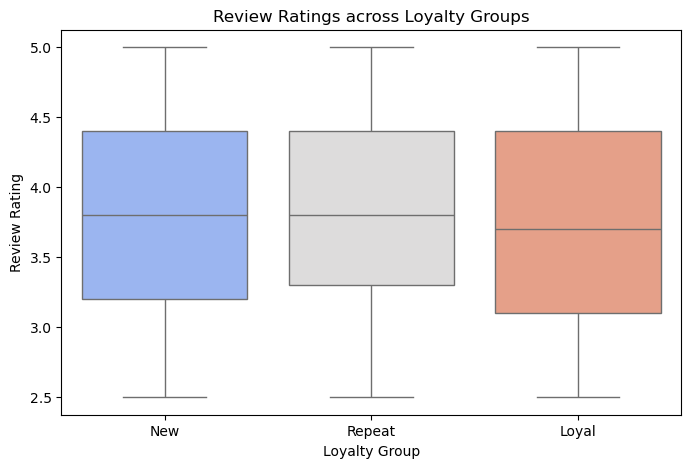

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Loyalty Group', y='Review Rating', data=df, palette="coolwarm")
plt.title("Review Ratings across Loyalty Groups")
plt.show()

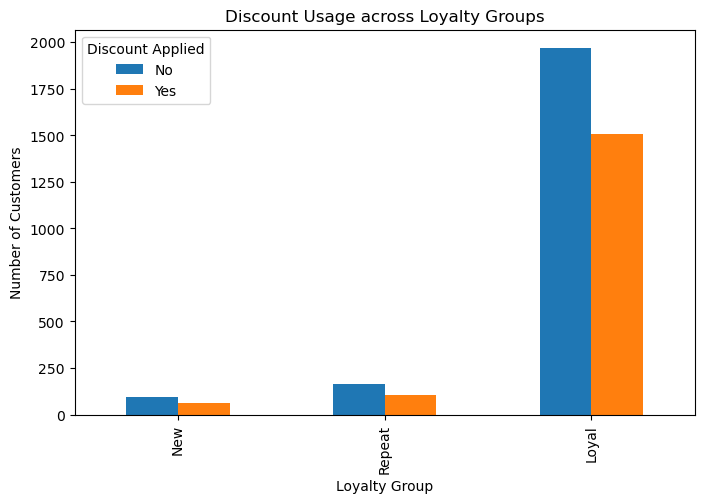

In [23]:
loyalty_discount = pd.crosstab(df['Loyalty Group'], df['Discount Applied'])
loyalty_discount.plot(kind="bar", stacked=False, figsize=(8,5))
plt.title("Discount Usage across Loyalty Groups")
plt.ylabel("Number of Customers")
plt.show()

Text(0.5, 1.0, 'Total Purchase Amount by Season and Category')

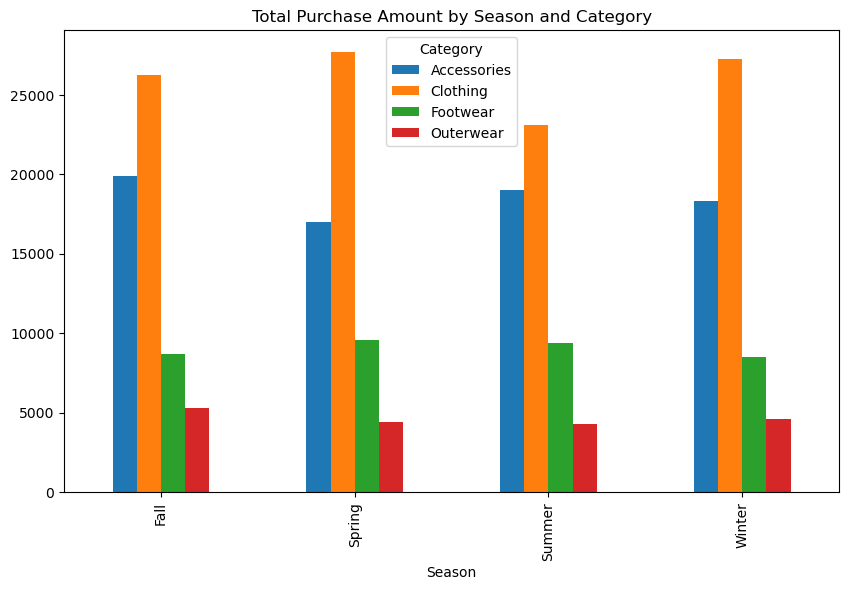

In [24]:
df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Total Purchase Amount by Season and Category")

Text(0.5, 1.0, 'Total Purchase Amount by Preferred Payment Method and Frequency of Purchases')

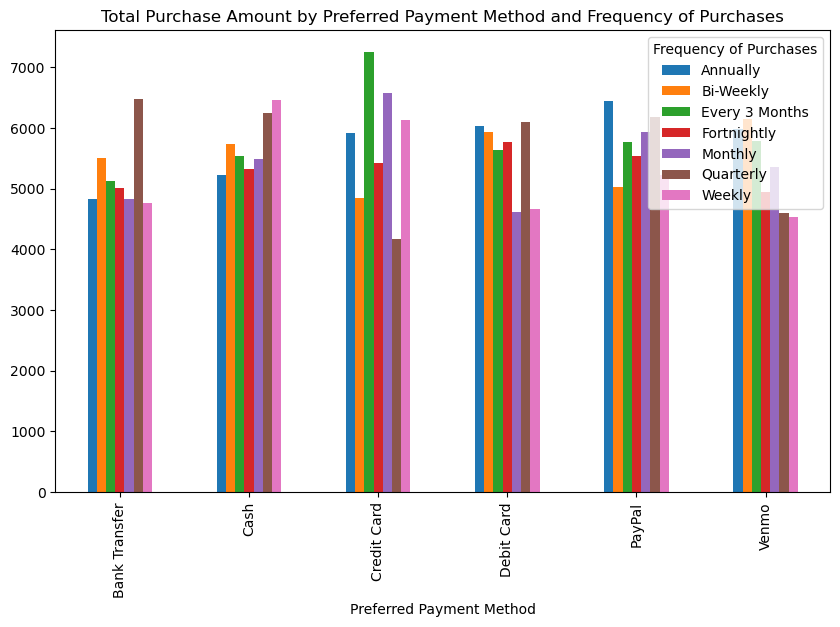

In [25]:
df.groupby(['Preferred Payment Method', 'Frequency of Purchases'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Total Purchase Amount by Preferred Payment Method and Frequency of Purchases")

Text(0.5, 1.0, 'Total Purchase Amount by Preferred Payment Method and Season')

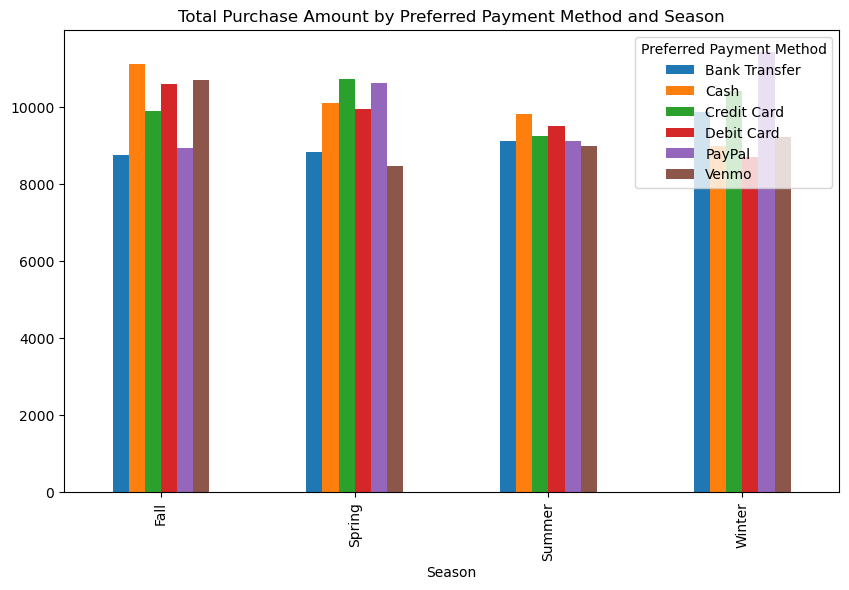

In [26]:
df.groupby(['Season', 'Preferred Payment Method'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Total Purchase Amount by Preferred Payment Method and Season")

Text(0.5, 1.0, 'Total Purchase Amount by Discount Applied and Size')

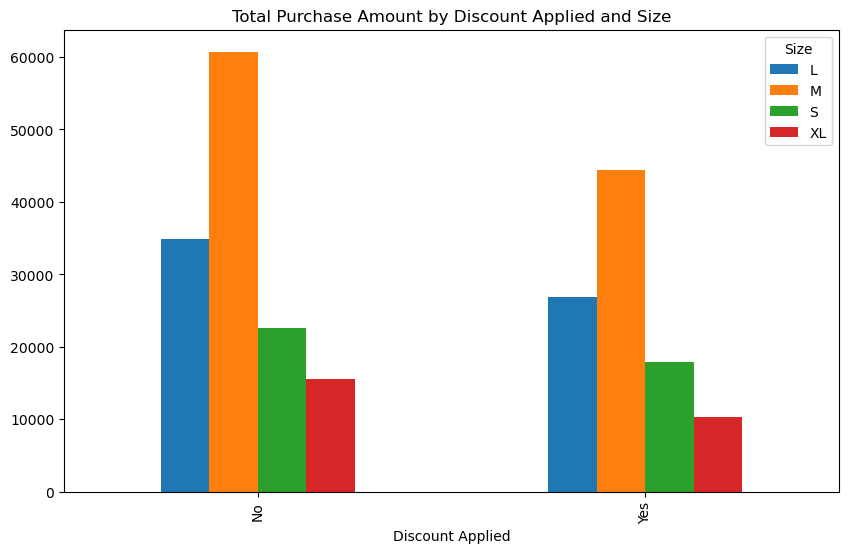

In [27]:
df.groupby(['Discount Applied', 'Size'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Total Purchase Amount by Discount Applied and Size")

Text(0.5, 1.0, 'Total Purchase Amount by Shipping Type and Category')

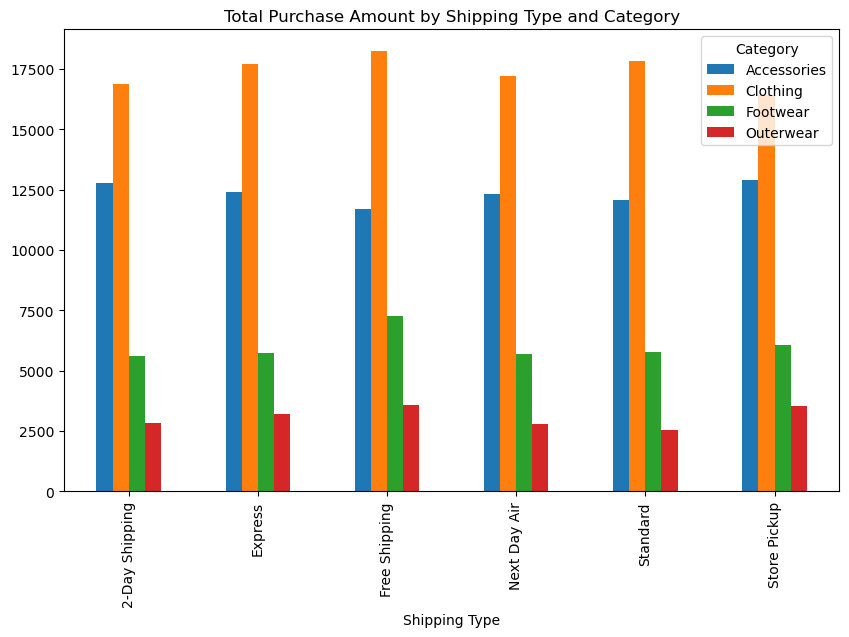

In [28]:
df.groupby(['Shipping Type', 'Category'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Total Purchase Amount by Shipping Type and Category")

Text(0.5, 1.0, 'Total Purchase Amount by Shipping Type and Payment Method')

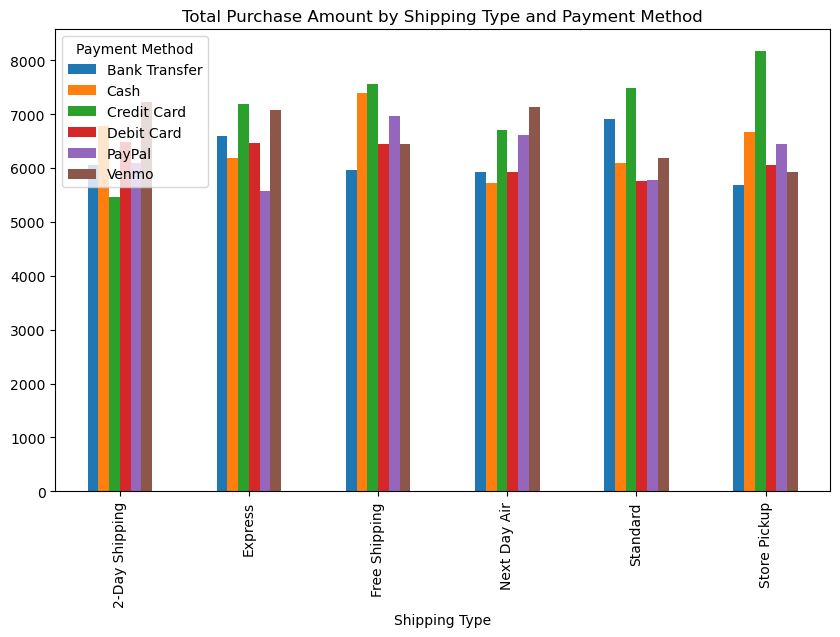

In [29]:
df.groupby(['Shipping Type', 'Payment Method'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Total Purchase Amount by Shipping Type and Payment Method")

In [30]:
df['Review'] = pd.cut(df['Review Rating'], bins=[0, 1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])

Text(0.5, 1.0, 'Total Purchase Amount by Shipping Type and Category')

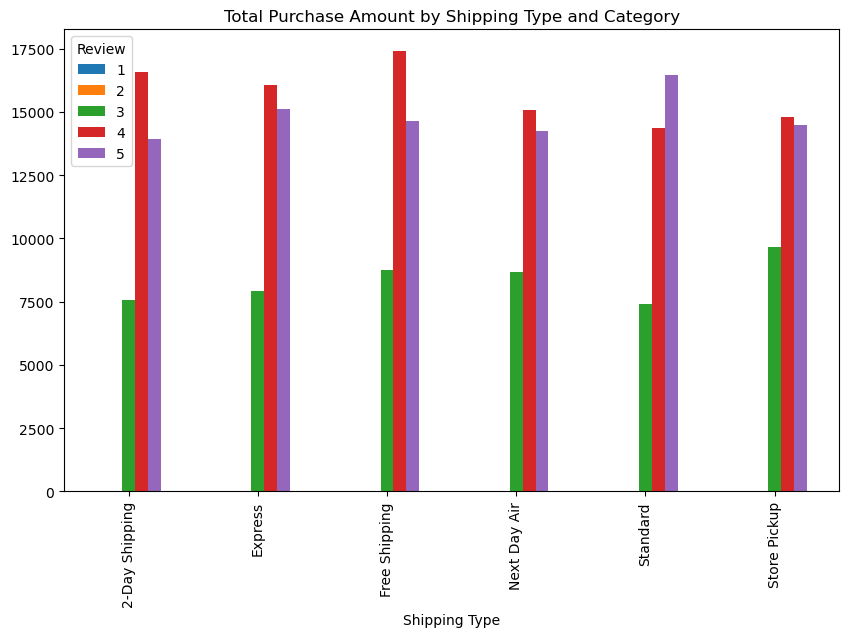

In [31]:
df.groupby(['Shipping Type', 'Review'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Total Purchase Amount by Shipping Type and Category")

##### Correlation

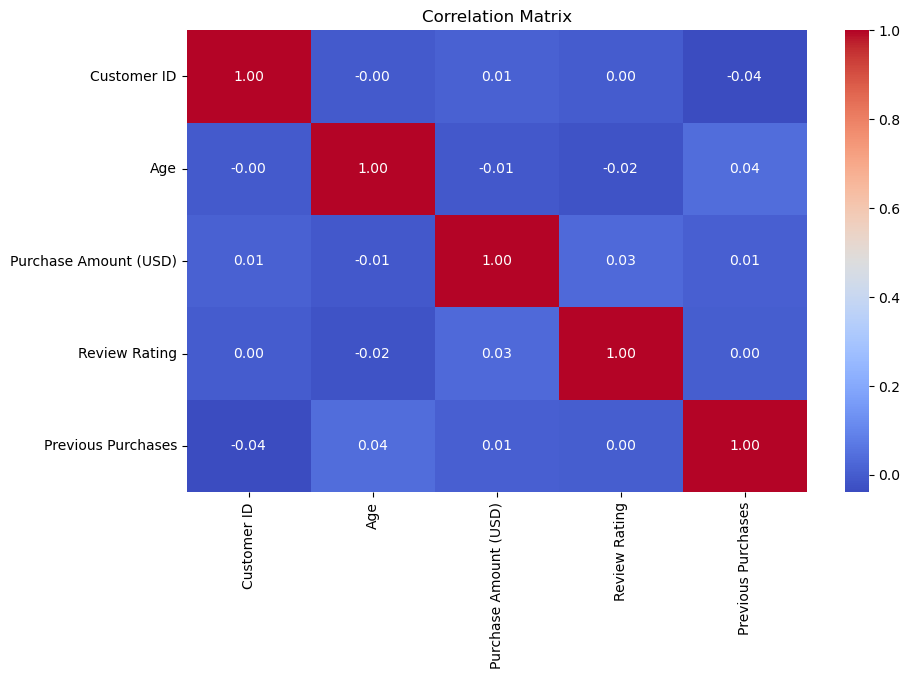

In [32]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Feature Engineering
- Created a Loyalty Group feature based on previous purchases.
- Binned review ratings for further analysis.

#### Encoding

- Applied one-hot encoding to categorical features.
- Scaled numerical features using StandardScaler.

In [33]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# ----------------------------
# 1. Drop ID column
# ----------------------------
df = df.drop(columns=["Customer ID"], errors="ignore")

# ----------------------------
# 2. Define feature groups
# ----------------------------
numeric = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]

binary = ["Subscription Status", "Discount Applied", "Promo Code Used"]

ordinal = {
    "Size": ["S", "M", "L", "XL", "XXL"],
    "Frequency of Purchases": sorted(df["Frequency of Purchases"].unique())
}

categorical = ["Gender", "Category", "Season", "Payment Method", "Shipping Type", "Preferred Payment Method"]

# ----------------------------
# 3. Convert binary manually
# ----------------------------
for col in binary:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# ----------------------------
# 4. Build Preprocessor
# ----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("ord", OrdinalEncoder(categories=[ordinal["Size"], ordinal["Frequency of Purchases"]]),
         list(ordinal.keys())),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("bin", "passthrough", binary)
    ]
)

# ----------------------------
# 5. Transform Data
# ----------------------------
X = preprocessor.fit_transform(df)

# ----------------------------
# 6. Convert to DataFrame
# ----------------------------
ohe_cols = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical)
final_cols = numeric + list(ordinal.keys()) + list(ohe_cols) + binary

X_df = pd.DataFrame(X.toarray() if hasattr(X, "toarray") else X, columns=final_cols)

X_df.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Size,Frequency of Purchases,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,...,Shipping Type_Store Pickup,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Subscription Status,Discount Applied,Promo Code Used
0,0.718913,-0.285629,-0.907584,-0.785831,2.0,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,-1.648629,0.178852,-0.907584,-1.616552,2.0,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.390088,0.558882,-0.907584,-0.162789,0.0,6.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,-1.517099,1.276716,-0.349027,1.637107,1.0,6.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.061263,-0.454531,-1.466141,0.391025,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


#### Clusterting
- Used KMeans clustering to segment customers.
- Determined optimal cluster count using the Elbow Method.

In [35]:
from sklearn.cluster import KMeans

In [39]:
model = KMeans(n_clusters=5, random_state=42)
cluster_labels = model.fit_predict(X_df)

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [41]:
labels = cluster_labels

silhouette = silhouette_score(X_df, labels)
davies = davies_bouldin_score(X_df, labels)
calinski = calinski_harabasz_score(X_df, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Score: {davies:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.3f}")

Silhouette Score: 0.061
Davies-Bouldin Score: 3.210
Calinski-Harabasz Score: 415.482


In [42]:
wcss = []
k_range = range(1,20)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_df)
    wcss.append(model.inertia_)

In [43]:
wcss

[53869.93256410257,
 42149.58504581422,
 39978.21743026636,
 38655.61161830852,
 37758.88391127013,
 36690.6153162999,
 36171.687397620044,
 35421.41830815385,
 34731.17935402533,
 34277.553914860684,
 33975.91940488743,
 33502.60442848017,
 33126.25333582943,
 32691.408311455398,
 32179.68676109304,
 31940.933042923796,
 31762.954234062665,
 31321.39891060115,
 31164.879321359458]

### Elbow Method

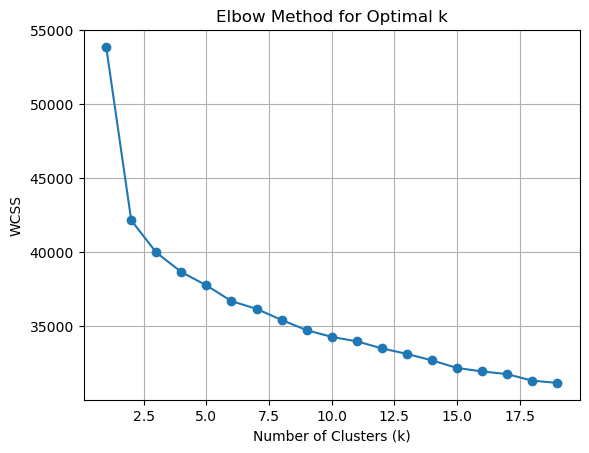

In [44]:
plt.plot(k_range, wcss, marker = 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [45]:
KMeans_final = KMeans(n_clusters=4, random_state=42)
cluster_labels = KMeans_final.fit_predict(X_df)

In [46]:
KMeans_final

KMeans(n_clusters=4, random_state=42)

In [47]:
cluster_labels

array([2, 2, 1, ..., 1, 1, 1], shape=(3900,), dtype=int32)

In [48]:
X_df['cluster'] = cluster_labels

#### Dimensionality Reduction & Visualization
- Reduced data dimensions with PCA for visualization.
- Plotted clusters in 2D space.

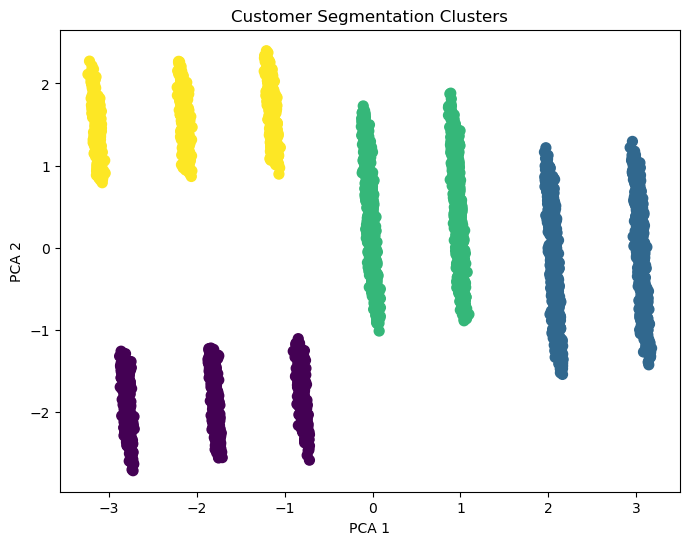

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(X_df)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segmentation Clusters")
plt.show()


In [50]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


#### Cluster Evaluation
- Calculated Silhouette, Davies-Bouldin, and Calinski-Harabasz scores to assess clustering quality.
- Summarized cluster characteristics.

In [51]:
labels = cluster_labels

silhouette = silhouette_score(pca_data, labels)
davies = davies_bouldin_score(pca_data, labels)
calinski = calinski_harabasz_score(pca_data, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Score: {davies:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.3f}")


Silhouette Score: 0.134
Davies-Bouldin Score: 2.358
Calinski-Harabasz Score: 703.386


In [52]:
X_df['cluster'].value_counts()    

cluster
1    1102
2    1095
0     856
3     847
Name: count, dtype: int64

In [53]:
cluster_summary = X_df.groupby("cluster").mean(numeric_only=True)
cluster_summary

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Size,Frequency of Purchases,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,...,Shipping Type_Store Pickup,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Subscription Status,Discount Applied,Promo Code Used
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.844912,0.024502,-0.013794,0.087996,1.355140,0.981308,0.324766,0.675234,0.317757,0.433411,...,0.163551,0.133178,0.176402,0.185748,0.160047,0.174065,0.170561,0.258178,0.428738,0.428738
1,0.039421,-0.011623,-0.009432,0.067380,1.324864,5.489111,0.309437,0.690563,0.322142,0.436479,...,0.164247,0.175136,0.186025,0.159710,0.155172,0.178766,0.145191,0.269510,0.431034,0.431034
2,-0.008526,-0.024100,0.022197,-0.005306,1.292237,3.505023,0.317808,0.682192,0.311416,0.443836,...,0.168037,0.148858,0.174429,0.183562,0.159817,0.172603,0.160731,0.275799,0.438356,0.438356
3,-0.894156,0.021516,-0.002484,-0.169737,1.314050,1.033058,0.331759,0.668241,0.321133,0.471074,...,0.171192,0.167651,0.145218,0.159386,0.180638,0.167651,0.179457,0.275089,0.419126,0.419126


In [54]:
X_df.columns

Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
       'Size', 'Frequency of Purchases', 'Gender_Female', 'Gender_Male',
       'Category_Accessories', 'Category_Clothing', 'Category_Footwear',
       'Category_Outerwear', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Payment Method_Bank Transfer', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Debit Card',
       'Payment Method_PayPal', 'Payment Method_Venmo',
       'Shipping Type_2-Day Shipping', 'Shipping Type_Express',
       'Shipping Type_Free Shipping', 'Shipping Type_Next Day Air',
       'Shipping Type_Standard', 'Shipping Type_Store Pickup',
       'Preferred Payment Method_Bank Transfer',
       'Preferred Payment Method_Cash', 'Preferred Payment Method_Credit Card',
       'Preferred Payment Method_Debit Card',
       'Preferred Payment Method_PayPal', 'Preferred Payment Method_Venmo',
       'Subscription Status', 'Discount Applied', '

#### Dimensionality Reduction & Visualization
- Reduced data dimensions with PCA for visualization.
- Plotted clusters in 2D space.

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df)

In [57]:
KMeans_final = KMeans(n_clusters=4, random_state=42)
cluster_labels = KMeans_final.fit_predict(X_pca)

In [58]:
KMeans_final

KMeans(n_clusters=4, random_state=42)

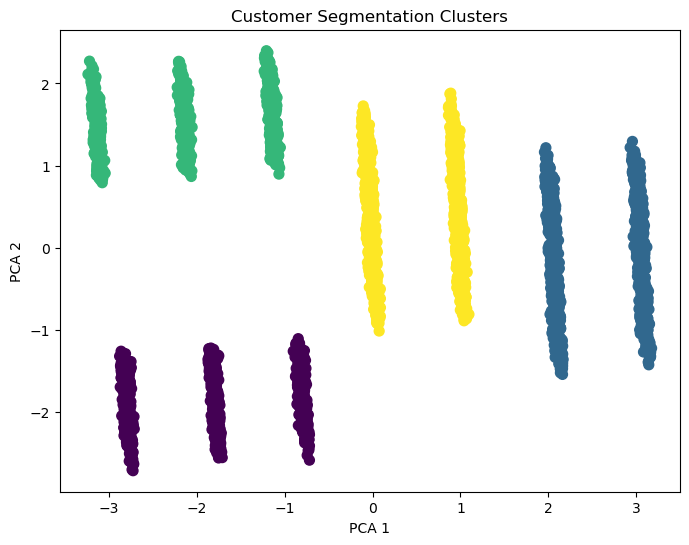

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segmentation Clusters")
plt.show()


#### Cluster Evaluation
- Calculated Silhouette, Davies-Bouldin, and Calinski-Harabasz scores to assess clustering quality.
- Summarized cluster characteristics.

In [60]:
labels = cluster_labels

silhouette = silhouette_score(X_pca, labels)
davies = davies_bouldin_score(X_pca, labels)
calinski = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Score: {davies:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.3f}")

Silhouette Score: 0.558
Davies-Bouldin Score: 0.643
Calinski-Harabasz Score: 8463.281


In [61]:
X_df['cluster'].value_counts()    

cluster
1    1102
2    1095
0     856
3     847
Name: count, dtype: int64

In [62]:
cluster_summary = X_df.groupby('cluster').mean(numeric_only=True)
cluster_summary

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Size,Frequency of Purchases,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,...,Shipping Type_Store Pickup,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Subscription Status,Discount Applied,Promo Code Used
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.844912,0.024502,-0.013794,0.087996,1.355140,0.981308,0.324766,0.675234,0.317757,0.433411,...,0.163551,0.133178,0.176402,0.185748,0.160047,0.174065,0.170561,0.258178,0.428738,0.428738
1,0.039421,-0.011623,-0.009432,0.067380,1.324864,5.489111,0.309437,0.690563,0.322142,0.436479,...,0.164247,0.175136,0.186025,0.159710,0.155172,0.178766,0.145191,0.269510,0.431034,0.431034
2,-0.008526,-0.024100,0.022197,-0.005306,1.292237,3.505023,0.317808,0.682192,0.311416,0.443836,...,0.168037,0.148858,0.174429,0.183562,0.159817,0.172603,0.160731,0.275799,0.438356,0.438356
3,-0.894156,0.021516,-0.002484,-0.169737,1.314050,1.033058,0.331759,0.668241,0.321133,0.471074,...,0.171192,0.167651,0.145218,0.159386,0.180638,0.167651,0.179457,0.275089,0.419126,0.419126
